# **Multiple layer perceptron solved the problem of single perceptron: ***XOR*****

## Single perceptron

Single perceptron is inspired by biological neuron. 
<figure align="center">
    <img src="../assets/images/perceptron/single_perceptron_biological_neuron.png">
    <p> Fig 1. Biological neuron and single perceptron </p>
</figure>


It takes multiple input $x_1, x_2,..., x_n$ and applies weights $w_1, w_2,..., w_n$ to them, sums of them and passes the result through an activation function, like sign, sigmoid, tanh, ReLU,... function. 
<figure align="center">
    <img src="../assets/images/perceptron/single_perceptron_architecture.png">
    <p> Fig 2. Single perceptron architecture </p>
</figure>

With a single perceptron, it can represent a linear classifier: line, plane or hyperplane.
<figure align="center">
    <img src="../assets/images/perceptron/single_perceptron_linear_classifier.png">
    <p> Fig 3. Single perceptron represent a linear classifier </p>
</figure>

### Visualize single perceptron as a linear classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Classify points using a single-layer perceptron
points = np.array([[0, 0],  # Label: -1
                   [0, 1],  # Label: +1
                   [1, 0],  # Label: +1
                   [1, 1]]) # Label: +1
labels = np.array([-1, 1, 1, 1])

In [33]:
"""  A perceptron with 2 inputs (x1, x2) and bias b, represents a linear classifier.
     - W: weights
     - b: bias
     - output: y = sign_function(w1*x1 + w2*x2 + b)
     - Y: wrong labels
     Using gradient descent to update weights and bias until all points are correctly classified.
"""
# Init weights: w1, w2
W = np.array([0, 1])
# Init bias: b
b = np.array([-0.5])
# Init Y:
# Y = np.zeros_like(labels)
Y = []

In [34]:
# Activation function: sign function
def sign(W, x, b):
    return 1 if (np.dot(W, x) + b) >= 0 else -1

In [35]:
# Determine Y:
def determine_Y(sign, W, b, points, labels):
    Y = []
    for index in range(len(labels)):
        if labels[index] != sign(W, points[index], b):
            # If wrong
            # Y[index] = 1
            Y.append(index)
    return Y


In [36]:
print(determine_Y(sign=sign, W=W, b=b, points=points, labels=labels))

[2]


In [37]:
def gradient_descent(W_old, b_old, learning_rate, Y, points, labels):
    """ Gradient Descent (Perceptron Learning Rule): 
        For misclassified points (Y[k] = 1):
        W_new = W_old + learning_rate * sum(t_k * x_k)
        b_new = b_old + learning_rate * sum(t_k)
        
        where t_k is the true label and x_k is the input point
    """
    sum_w = np.zeros_like(W_old, dtype=float)
    sum_b = 0
    
    for index in Y:
        sum_w += labels[index] * points[index]
        sum_b += labels[index]
    
    W_new = W_old + learning_rate * sum_w
    b_new = b_old + learning_rate * sum_b
    
    return W_new, b_new

In [40]:
### Plot 2D coordinate system with points and decision boundary
def plot_decision_boundary(W, b, points, labels):
    plt.figure()
    # Plot all points
    for i, point in enumerate(points):
        if labels[i] == 1:
            plt.scatter(x=point[0], y=point[1], marker="X", c='Blue')
        else:
            plt.scatter(x=point[0], y=point[1], marker='o', c='Red')
    # Plot y = slope*x + intercept 
    # w1*x1 + w2*x2 + b = 0 <=> x2 = (-w1/w2)*x1 -b/w2
    y_slope = -W[0]/W[1]
    y_intercept = -b/W[1]
    x = np.linspace(-0.3, 2, 111)
    y = y_slope*x + y_intercept
    plt.plot(x, y, 'g-', label=f'y={y_slope}x + ({y_intercept})')

    # Set axis limits
    plt.xlim(-0.3, 2)
    plt.ylim(-0.3, 2)
    # Add gird and label
    plt.axhline(y=0, color='k', linewidth=0.5) # x-axis
    plt.axvline(x=0, color='k', linewidth=0.5) # y-axis
    plt.xlabel('x')
    plt.ylabel('y')
    # plt.title("Perceptron: init linear classifier")
    plt.legend()

    plt.show()


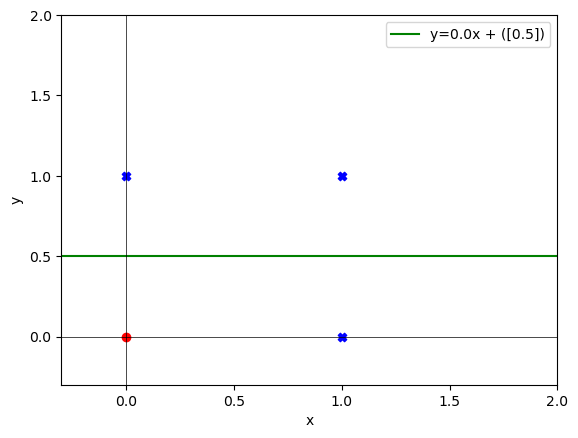

In [41]:
plot_decision_boundary(W, b, points, labels)

In [43]:
# Run gradient descent until convergence
MAX_ITERATOR = 100 
LEARNING_RATE = 0.1
history_W = []
history_b = []

for i in range(MAX_ITERATOR):
    Y = determine_Y(sign=sign, W=W, b=b, points=points, labels=labels)
    W, b = gradient_descent(W_old=W, b_old=b, learning_rate=LEARNING_RATE, Y=Y, points=points, labels=labels)
    
    history_W.append(W)
    history_b.append(b)

    if len(Y) == 0: break

In [44]:
print(history_W)
print(history_b)

[array([0.1, 1. ]), array([0.2, 1. ]), array([0.3, 1. ]), array([0.3, 1. ])]
[array([-0.4]), array([-0.3]), array([-0.2]), array([-0.2])]


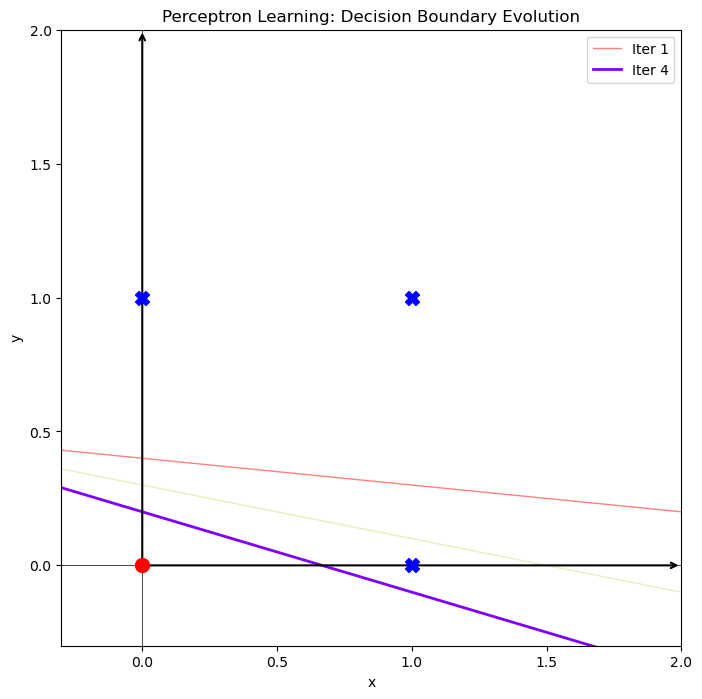

In [55]:
def plot_all_decision_boundaries(history_W, history_b, points, labels):
    plt.figure(figsize=(8, 8))
    
    # Plot all points
    for i, point in enumerate(points):
        if labels[i] == 1:
            # zorder (like z-index): higher values are drawn on top of lower values
            # zorder=5  :   ensure points appear the lines
            plt.scatter(x=point[0], y=point[1], marker="X", c='Blue', s=100, zorder=5)
        else:
            plt.scatter(x=point[0], y=point[1], marker='o', c='Red', s=100, zorder=5)
    
    # Plot decision boundaries for each iteration
    # viridis | plasma | coolwarm | rainbow | etc
    colors = plt.cm.rainbow_r(np.linspace(0, 1, len(history_W))) # Create color gradient
    x = np.linspace(-0.3, 2, 111)
    
    for i, (W, b) in enumerate(zip(history_W, history_b)):
        if W[1] != 0:
            y_slope = -W[0] / W[1]
            y_intercept = -b / W[1]
            y = y_slope * x + y_intercept
            alpha = 0.5 if i < len(history_W) - 1 else 1.0
            linewidth = 1 if i < len(history_W) - 1 else 2
            plt.plot(x, y, color=colors[i], alpha=alpha, linewidth=linewidth, 
                     label=f'Iter {i+1}' if i == 0 or i == len(history_W)-1 else None)
    
    plt.xlim(-0.3, 2)
    plt.ylim(-0.3, 2)
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    # X-axis arrow
    plt.annotate('', xy=(2, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))
    # Y-axis arrow
    plt.annotate('', xy=(0, 2), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Perceptron Learning: Decision Boundary Evolution')
    plt.legend()
    plt.show()

# Call the function
plot_all_decision_boundaries(history_W, history_b, points, labels)

### Limitation of single perceptron

Single perceptron can represent a linear classifier, but it has a big limitation: it cannot represent non-linear  like XOR function.
<figure align="center">
    <img src="../assets/images/perceptron/single_perceptron_2D_coordinate_XOR.png">
    <p> Fig 4. Single perceptron cannot represent XOR function </p>
</figure>

So, we need a more complex architecture to solve this problem.

## Multiple layer perceptron

Multiple layer perceptron (MLP) is a network of single perceptrons. It has an input layer, one or more hidden layers, and an output layer. MLP is also known as a neural network (NN).
<figure align="center">
    <img src="../assets/images/perceptron/mlp_architecture.png">
    <p> Fig 5. Multiple layer perceptron architecture </p>
</figure>


Therefore, MLP can represent non-linear functions like XOR function. It solved the limitation of single perceptron.
<figure align="center">
    <img src="../assets/images/perceptron/mlp_XOR_function.png">
    <p> Fig 6. Multiple layer perceptron represent XOR function </p>
</figure>

In MLP or NN, if there are more than one hidden layer, it is called deep neural network (DNN) or deep learning.
That's why deep learning is a part of machine learning and it is a exciting area in recent years.


---

### The end